In [98]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
#reading the csv file
df = pd.read_csv('premier-league.csv')
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,Wolverhampton Wanderers,Hayao Kawabe,26.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22971,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22972,Wolverhampton Wanderers,Adama Traoré,26.0,Right Winger,Barcelona,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22973,Wolverhampton Wanderers,Bruno Jordão,23.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022


In [100]:
#selecting rows only from season 2018/2019 onwards
df = df[df['season'].isin(['2018/2019','2019/2020','2020/2021','2021/2022'])]
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,Leicester,€67.80m,in,Summer,67.80,Premier League,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,PEC Zwolle,€2.50m,in,Summer,2.50,Premier League,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,Melbourne City,€890Th.,in,Summer,0.89,Premier League,2018,2018/2019
20132,Manchester City,Manu García,20.0,Attacking Midfield,Man City U23,-,in,Summer,NaN,Premier League,2018,2018/2019
20133,Manchester City,Arijanet Muric,19.0,Goalkeeper,Man City U23,-,in,Summer,NaN,Premier League,2018,2018/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
22970,Wolverhampton Wanderers,Hayao Kawabe,26.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22971,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22972,Wolverhampton Wanderers,Adama Traoré,26.0,Right Winger,Barcelona,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022
22973,Wolverhampton Wanderers,Bruno Jordão,23.0,Central Midfield,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2021,2021/2022


Just like how we did with the Standings dataset, we will also only choose the past 5 years instead of going back to the year 1992. This is because the goal of the project is to identify the transfer spendings of Premier League teams. Therefore, I only chose to analyze the transfer spendings of the past 5 years because the data is more relevant. 

In [101]:
#Finding out the number of duplicated values
df.duplicated().sum()

0

In [102]:
#Finding out the number of null values
df.isna().sum()


club_name                0
player_name              0
age                      1
position                 0
club_involved_name       0
fee                      0
transfer_movement        0
transfer_period          0
fee_cleaned           1814
league_name              0
year                     0
season                   0
dtype: int64

From here, we can see that there are a lot of null values in the fee cleaned dataset. I decided to remove all the null values because the large number of null values can affect the result of the analysis. 

In [103]:
#Dropping the null values
df.dropna(inplace=True)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\614617987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [104]:
#looking at the number of rows and columns in the dataframe
df.shape

(1031, 12)

In [105]:
#Because we are only interested in buyings, we will focus on 'in' transfer movement
df_bought = df.loc[df['transfer_movement']== 'in']
df_bought.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,Leicester,€67.80m,in,Summer,67.80,Premier League,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,PEC Zwolle,€2.50m,in,Summer,2.50,Premier League,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,Melbourne City,€890Th.,in,Summer,0.89,Premier League,2018,2018/2019
20158,Manchester United,Fred,25.0,Central Midfield,Shakhtar D.,€59.00m,in,Summer,59.00,Premier League,2018,2018/2019
20159,Manchester United,Diogo Dalot,19.0,Right-Back,FC Porto,€22.00m,in,Summer,22.00,Premier League,2018,2018/2019


This dataset that I obtained does not only contains the buyings of Premier League teams, but they also have records of players sold. Players sold and players bought are determined in the 'transfer_movement' column. If the transfer movement is 'in', it means that the team bought the player. Where else if the transfer_movement is 'out', the team have sold the player. Because I am only interested in the analysis of the teams transfer spending, I have decided to filter out the 'out' transfer movement to remove irrelevant data. 

In [106]:
#For future reference, we also want to keep information on sellings. So we will also extract 'out' values in transfer_movement
df_sold = df.loc[df['transfer_movement']=='out']


However, it is important to have a record of the 'out' transfer movement records as well just in case I want to make an analysis of the team's selling information in the future. 

In [107]:
#Removing unnecessary columns
columns_drop = ['club_involved_name','fee','transfer_movement','league_name','transfer_period']
df_bought.drop(columns_drop,axis = 1,inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\2297855161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.drop(columns_drop,axis = 1,inplace = True)


,club_name,player_name,age,position,fee_cleaned,year,season
20129,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
20130,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
20131,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
20158,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
20159,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
22947,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
22948,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
22962,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
22963,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [108]:
#Resetting the index column 
df_bought.reset_index(inplace = True)
df_bought

,index,club_name,player_name,age,position,fee_cleaned,year,season
0,20129,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,20130,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,20131,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,20158,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,20159,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...,...
498,22947,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,22948,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,22962,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
501,22963,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [109]:
#Drop column named index
df_bought.drop('index',axis = 1, inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\3244686202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.drop('index',axis = 1, inplace = True)


,club_name,player_name,age,position,fee_cleaned,year,season
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022
501,Wolverhampton Wanderers,Sang-bin Jeong,19.0,Right Winger,1.20,2021,2021/2022


In [110]:
#Renaming the index into transfer_id
df_bought.index.name = 'transfer_id'
df_bought

,club_name,player_name,age,position,fee_cleaned,year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022


In [111]:
#Renaming the fee_cleaned column to something more identifiable
df_bought.rename(columns={'fee_cleaned':'transfer_fee(millions)'},inplace = True)
df_bought

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\2286385306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought.rename(columns={'fee_cleaned':'transfer_fee(millions)'},inplace = True)


,club_name,player_name,age,position,transfer_fee(millions),year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019
...,...,...,...,...,...,...,...
498,Watford FC,Yaser Asprilla,18.0,Attacking Midfield,3.00,2021,2021/2022
499,Watford FC,Samuel Kalu,24.0,Right Winger,3.00,2021,2021/2022
500,Wolverhampton Wanderers,Chiquinho,21.0,Left Winger,3.50,2021,2021/2022


We want to make the columns as readable as possible, and it is easier to understand the meaning of 'transfer_fee' than 'fee cleaned'.

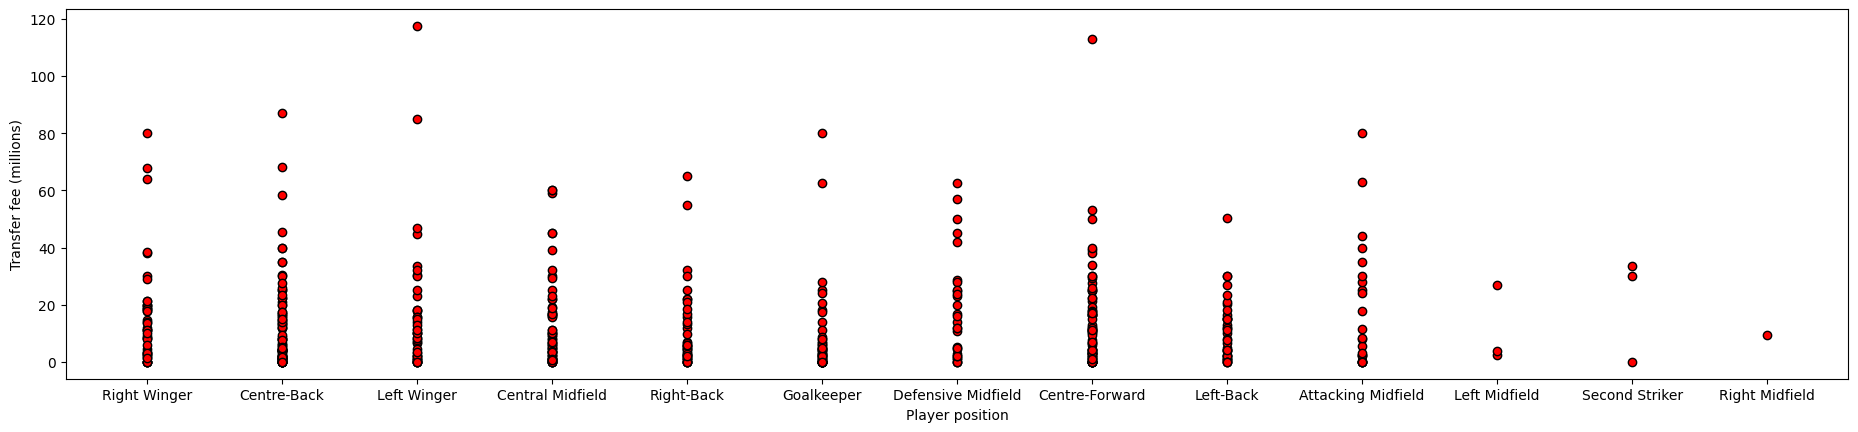

In [112]:
#plotting a scatter plot diagram to identify outliers
position = df_bought['position']
transfer_fee = df_bought['transfer_fee(millions)']

plt.figure().set_figwidth(23)
plt.scatter(position,transfer_fee, color = 'red', edgecolors='black')
plt.xlabel('Player position')
plt.ylabel('Transfer fee (millions)')
plt.show()

From here, we can see that there are not more than three players for the position left midfield, second striker and right midfield. This is because in modern football, ther eis not much difference between left midfielder and left winger, right midfielder and right winger, second striker and striker. Therefore, I have decided to convert the outliers into their similar counterparts


In [113]:
#Removing outliers
df_bought['position'].replace({'Left Midfield':'Left Winger','Second Striker':'Centre-Forward','Right Midfield':'Right Winger'},inplace = True)


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\3976943587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['position'].replace({'Left Midfield':'Left Winger','Second Striker':'Centre-Forward','Right Midfield':'Right Winger'},inplace = True)


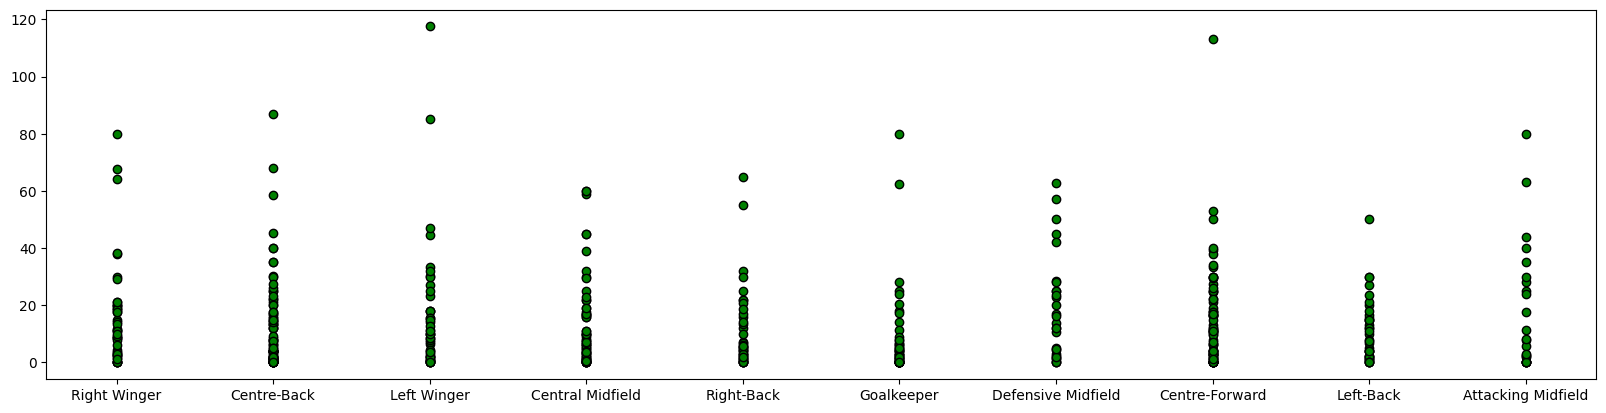

In [114]:
#Checking for outliers again
plt.figure().set_figwidth(20)
plt.scatter(df_bought['position'],df_bought['transfer_fee(millions)'],color = 'green',edgecolors = 'black')

We can now see that there are no more outliers 

In [115]:
#Removing 'FC' from the club_name column
df_bought['club_name'] = df_bought['club_name'].str.replace('FC','')
df_bought.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_75508\1538842137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bought['club_name'] = df_bought['club_name'].str.replace('FC','')


,club_name,player_name,age,position,transfer_fee(millions),year,season
transfer_id,,,,,,,
0,Manchester City,Riyad Mahrez,27.0,Right Winger,67.80,2018,2018/2019
1,Manchester City,Philippe Sandler,21.0,Centre-Back,2.50,2018,2018/2019
2,Manchester City,Daniel Arzani,19.0,Left Winger,0.89,2018,2018/2019
3,Manchester United,Fred,25.0,Central Midfield,59.00,2018,2018/2019
4,Manchester United,Diogo Dalot,19.0,Right-Back,22.00,2018,2018/2019


This is done to match with the rows in the 'club_name' column in the Standings table. When we want to join tables in SQL, we can use club_name columns in both the Transfers and Standings table. 

In [116]:
#Writing out dataset to a csv file
df_bought.to_csv('transfers_cleaned.csv',index = True)